In [1]:
#Step 0 : Import Dependencies

In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
#general modules
import pandas as pd
import numpy as np
import os

#visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

#modules to download and get data(optional)
import urllib.request
import tarfile

#module for machine learning model
import sklearn
assert sklearn.__version__ >="0.20"

In [ ]:
#Step 1: Load Data

In [15]:
#to read csv file
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [16]:
#Step 2: Data Analysis

In [17]:
#Prints first 5 lines
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
#(rows,columns)
df.shape

(20640, 10)

In [21]:
# check for null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [22]:
#Machine learning models don’t work well with null values, so let’s drop those nas:
df = df.dropna(subset=['total_bedrooms'])

In [23]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [30]:
df['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [29]:
#To count the repeated data in a single colum
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [31]:
#To remove the column
df = df.drop(columns=['ocean_proximity'])

In [32]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [34]:
df.to_csv('housing_cleaned_data.csv')

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

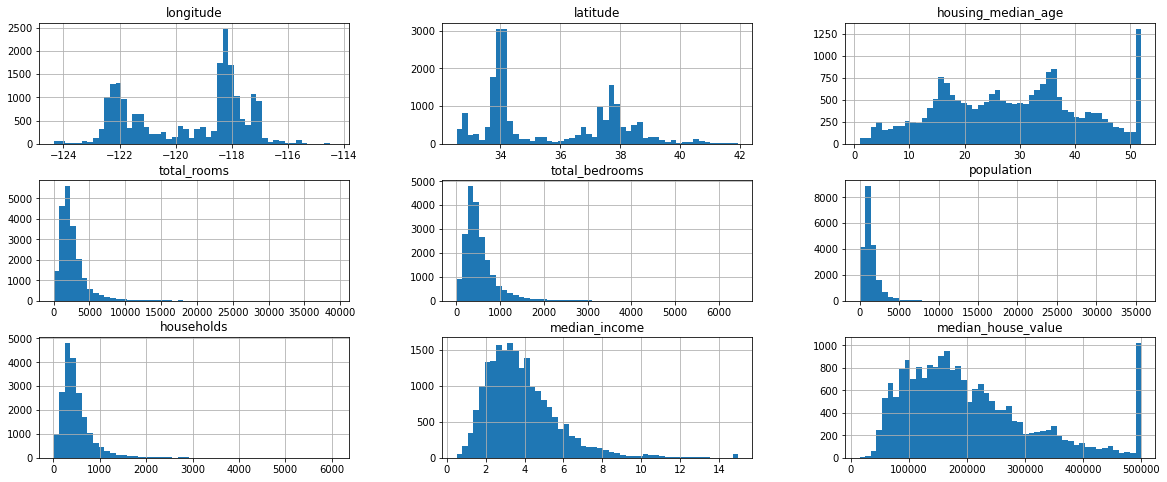

In [35]:
#Histogram visualization
#bins(no. of bars)
#figsize(chart size)
df.hist(bins=50, figsize=(20,8))

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabe

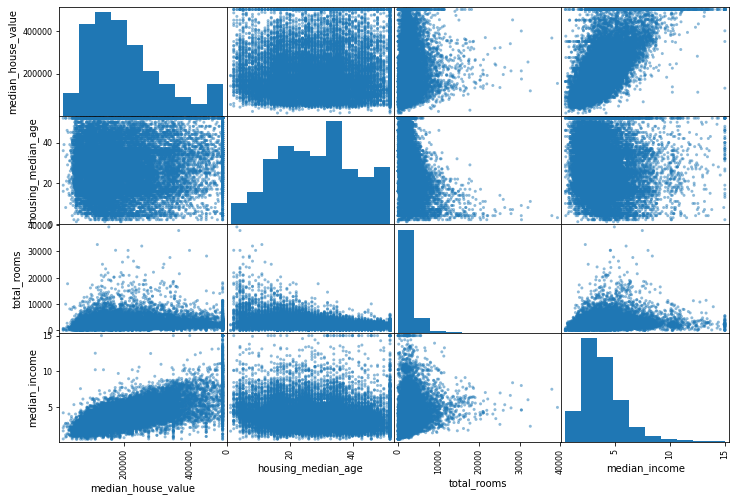

In [36]:
# for multiple scatter plots we can use the scatter_matrix from pandas.plotting
from pandas.plotting import scatter_matrix
variables = ['median_house_value','housing_median_age','total_rooms','median_income']
scatter_matrix(df[variables], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

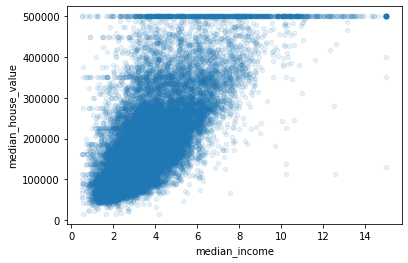

In [37]:
df.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

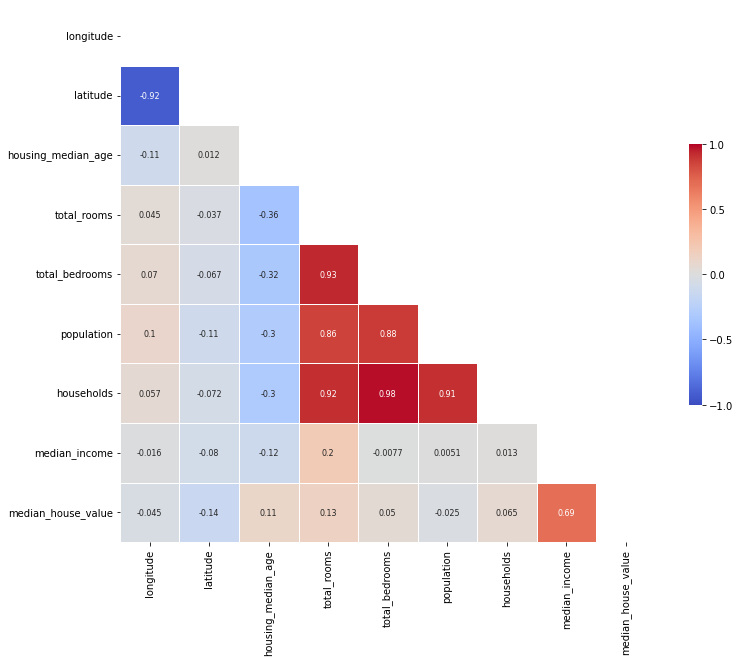

In [48]:
# Ensure that correlation_matrix is numeric
# correlation_matrix = df.corr()  # Calculate correlation matrix if needed

# To look up more correlations, I like to visualize them with a correlation matrix:
# Create mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Create the plot
f, ax = plt.subplots(figsize=(12, 12))

heatmap = sns.heatmap(correlation_matrix,
                      mask=mask,
                      square=True,
                      linewidths=.5,
                      cmap='coolwarm',
                      cbar_kws={'shrink': .4, 'ticks': [-1, -0.5, 0, 0.5, 1]},
                      vmin=-1,
                      vmax=1,
                      annot=True, annot_kws={"fontsize": 8})

# Set labels
ax.set_yticklabels(correlation_matrix.columns, rotation=0)
ax.set_xticklabels(correlation_matrix.columns)

# Set style
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

plt.show()

In [49]:
#Step 3: Split Data

In [52]:
#for reproducible results, let's set the random seed for 42 
#To make our sets stay the same even if we run the code multiple times.
np.random.seed(42)

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df)

print("Training set shape:", train_set.shape)
print("Test set shape:", test_set.shape)


Training set shape: (15324, 9)
Test set shape: (5109, 9)


In [53]:
#Step 4: Select and Train the Model

In [54]:
from sklearn.linear_model import LinearRegression 

# select variables 
X = df.drop(columns={'median_house_value'}) #all columns instead of median house value
y = df['median_house_value']

# print(X)
# print(y)

In [68]:
# split data in training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# set model 
model = LinearRegression()
# model.fit(X_train, y_train)
model.fit(X, y)

LinearRegression()

In [60]:
#Step 5: Model Evaluation

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse.round(2)}')
print(f'Mean Absolute Error: {mae.round(2)}') # It suggests that, on average, the model’s predictions are off by around (value) compared to the actual values.
print(f'R2: {r2.round(2)}') #variance

Mean Squared Error: 4915496391.94
Mean Absolute Error: 51382.72
R2: 0.64


In [84]:
# Step 6: Does a Random Forest Perform Better?

In [71]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)

# Make predictions
train_predictions = random_forest.predict(X_train)
test_predictions = random_forest.predict(X_test)

# Calculate R-squared scores
r1 = r2_score(y_train, train_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'R-squared for train: {r1.round(2)}')
print(f'R-squared for test: {r2.round(2)}')

R-squared for train: 0.97
R-squared for test: 0.82
